***
## <span style="color: #cc3535">***Peer Review: Overall Assessment*** </span>
The notebook executes without errors, is well structured and easy to follow (each part is sub-sectioned). All parts have been solved, with minor deviations from the proposed solution in **Part 6** and **7** due to the missing `z` argument in the function `compute_rates`. Functions and plots are generally defined in its own cell, according to the requirements. Plots are well presented and labeled. Functions included comments but lacks fully completed docstring (only include function description and not parameter explanations and what the function returns). The code could have been simplified in some parts, e.g., using the `initialize_simulation` function covered in lecture 7 (since the code need to initialize in both simulate_olg functions, unnecessary code repetition could be avoided) and initializing an instance for `Parameters`class (`par = Parameters()`) earlier on to avoid repetition as seen in **Part 3**. In **Part 6**, the function `euler_err_ar1` in the proposed solution uses vectorization instead of loops for efficiency. The submission uses loops, which is fine, but the solution could be improved by using vectorization. 

Overall, the submission is well done and meets the requirements of the assignment. All parts up to **Part 5** yield the correct results. The deviations in **Part 6** and **7** could be avoided by adjusting the function `compute_rates` to include the `z` argument.
***

# FIE463 Term Paper 1 - Final

## AI statement 

The entire code is done primarily using materials provided throughout this course, expecially lecture 7 material, and the workshop materials. As well as through methods learnt in courses like BAN401. We have used generative AI (specifically chatGPT 4.0) for general refinemenets, especially for the graphs to look more professional. Furthermore, AI was used to correct little errors that arised, in terms of spelling mistakes / small missteps. 

## Importing Libraries

In [2]:
# Importing all the libraries used throughout the Term Paper  
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from dataclasses import dataclass
from numpy.polynomial.hermite_e import hermegauss

## Part 1: Euler equation errors
In this section we begin by formulating the Euler equation for the representative households in the OLG model and then plot these errors over a range of capital values. 

### 1. Defining the data class parameters:

In [3]:
# Creating a class for the parameters 
@dataclass
class Parameters:
    beta: float = 0.96 ** 30
    gamma: float = 5.0
    alpha: float = 0.36
    delta: float = 1 - (0.94 ** 30)
    z: float = 1.0

    # Introducting tau (PAYGO) for PART 4, setting at 0 initially for PART 2 and 3 as there is no PAYGO system in those situations
    tau: float = 0.0

    # Introducing rho, sigma^2 and mu for PART 5 
    rho: float = 0.95 ** 30
    sigma_2: float = 0.05 ** 2
    mu: float = -0.5 * (sigma_2 / (1 + rho))

    # Introducing epsilon grid and prob for PART 5
    epsilon_grid, epsilon_prob = hermegauss(5)
    epsilon_prob /= np.sqrt(2 * np.pi)  

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>

The dataclass is well defined and structured. It includes all the necessary parameters for the assignment. For **Part 5** the grid and probability values could be defined as an empty numpy array, and later on filled with the correct values as seen in the proposed solution. However, the current implementation is also correct.
***


### 2. Implementing euler_err and helper functions:

In [4]:
# Defining the marginal utility function used in the euler equation
def marginal_util(c, gamma):

    if c <= 0:
        return np.inf # Assigning large error in case there is negative or zero consumption given  
    if gamma == 1:
        return 1 / c # Marginal utility if gamma equals 1, as c^-1 = 1/c
    else:
        return c ** (-gamma) # Marginal utility from the utility function given found through first derivative 

# Defining a function to compute both wage and interes rates, ensuring efficiency later
def compute_rates(k, par: Parameters):

    w_t = (1 - par.alpha) * par.z * (k ** par.alpha)
    r_t = (par.alpha * par.z * (k ** (par.alpha - 1))) - par.delta

    return w_t, r_t

# Defining Euler equation error function
def euler_err(k_next, k, par: Parameters):
    """
    Compute the Euler equation error for a given capital stock today and tomorrow.

    """
    # Computing wages and interest rates for today for capital stock k using the compute_rates function created above
    w_t_now, r_t_now = compute_rates(k, par)

    # Computing wages and interest rates for next period 
    w_t_next, r_t_next = compute_rates(k_next, par)

    # Computing pension payment (for PART 4)
    pension_next = par.tau * w_t_next 
    
    # Computing consumption for younf and old for both PART 3 and PART 4
    c_y = ((1 - par.tau) * w_t_now) - k_next # Consumption of young peopel (wages - savings) where savings is the next periods capital stock 
    c_o = (1 + r_t_next) * k_next + pension_next

    # Checking for negative or zero consumption values
    if c_y <= 0 or c_o <= 0:
        return np.inf # Assigning a large error if the consumption is negative or zero
    
    # Computing the Euler equation error using the marginal_util function
    lhs = marginal_util(c_y, par.gamma)
    rhs = par.beta * (1 + r_t_next) * marginal_util(c_o, par.gamma)
    err = lhs - rhs
    return err


***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>
The functions should have been defined in a separate cells to improve readability. However, The functions are well defined and structured. The function `euler_err` is correctly implemented and returns the correct results. The function `compute_rates` is missing the `z` argument, which is required for the function to work when `z` changes over time. The function `compute_rates` should be adjusted to include the `z` argument. As we will see later on in **Part 6** and **7** the results deviate from the proposed solution due to the missing `z` argument in the function `compute_rates`.

***

### 3. Plotting euler equation errors:

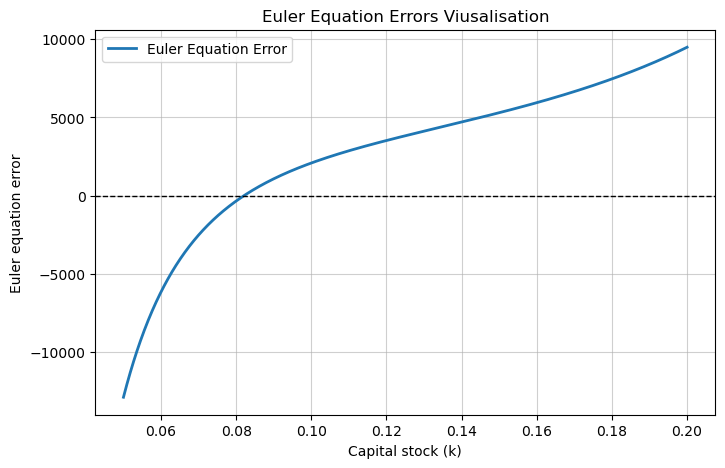

In [5]:
# Making a grid of capital levels
grid_k = np.linspace(0.05, 0.2, 1000) 

# Using the euler_err to find the errors in the given grid, ensuring that k_next = k
euler_error = [euler_err(k, k, Parameters()) for k in grid_k]

# Visualising plot of Euler equation errors
plt.figure(figsize=(8, 5))
plt.plot(grid_k, euler_error, label='Euler Equation Error', linewidth = 2) 
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 1) # Reference line at 0 (horizontal)

# Adding grid for for better visualisation
plt.grid(True, alpha = 0.6)

# Creating labels for both axis and titles 
plt.xlabel('Capital stock (k)')
plt.ylabel('Euler equation error')
plt.title('Euler Equation Errors Viusalisation')

# Adding legend
plt.legend()
plt.show()

### Definition
General definition of the Euler equation error: 
This measures the deviation between the left hand side (lhs) and the right hand side (rhs) of the Euler equation. The Euler equation finds and governs the optimal consumption and savings behaviour.

To answer the question of why it is upward sloping, one has to look at the deifnition of the error. The euler equation error represents the difference between the expected marginal utility of consumption today and tomorrow. When the capital levels are low, wages and consumption are also low. This will lead to a high marginal utility and strong incentives to save, resulting in a negative error. On the other hand, when capital increases, wages and consumption rise while the interest rate decline, reducing the incentuve to save. As a result from this the error will shift towards zero. Beyond a certain point, the execessive savings would lead to an overestimation of future consumption, making the error positive. The transition from negative to positive is why we can observe an upward sloping curve. 

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>
The explanation effectively defines the Euler equation error and its implications for consumption and savings. However, the explanation of why the error is upward sloping deviates a bit from the proposed solution. The solution ties the error more directly to consumption choices, while their explanation frames it in terms of interest rates and savings incentives.
***

## Part 2: Steady state
In this section we compute the steady-state equilibrium of the overlapping-generations (OLG) model, where all economic variables remain constant over time. Specifically we solve for the steady state capital stock and associated prices and allocations by finding the root of the Euler equation derived in part 1 which involves implementing a root finding algorithm that ensures the Euler equation is zero at the steady state. 

### 1. Defining the SteadyState data class:

In [6]:
@dataclass
class SteadyState:
    par: Parameters 
    K: float = None # Aggregate capital stock 
    L: float = None # Aggergate labour demand
    Y: float = None # Aggregate output 
    c_o: float = None # Consumption when old
    c_y: float = None # Consumption when young
    a: float = None # Savings (total)
    s_t: float = None # Savings rate
    r_t: float = None # Interest rate
    w_t: float  = None # Wage rate
    p: float = None # Pensioon 

### 2. Implementing compute steady state function:

In [7]:
# Defining a function to compute and return the steady state quantities and prices
def compute_steady_state(par: Parameters):
    """
    Compute the setady state of the OLG model.
    
    """
    # Using the function developed in Part 1 to define a new root-finding objective function that ensures that that k_next = k in steady state as instructed
    def euler_root(k):
        return euler_err(k, k, par)

    # Using the root-finding method to search for when euler_err = 0 (i.e. a root) within the same capital levels as Part 1
    root_k_steady = root_scalar(euler_root, bracket=(1e-8, 2.0), method='brentq')

    # Checking if no valid steady state capital was within the given range found if convergance fails 
    if not root_k_steady.converged:
        raise ValueError("Root-finding for steady state capital failed.")
    
    # Computing all the steady state values 

    # Extracting the steady state capital stock from the root-finding reuslt above, as the root of the Euler equation equals the steady state capital stock 
    K_steady = root_k_steady.root # Capital stock in steady state

    L_steady = 1.0 # Labour demand fixed at 1 

    Y_steady = par.z * (K_steady ** par.alpha) * (L_steady ** (1 - par.alpha)) # Output in steady state

    w_steady, r_steady = compute_rates(K_steady, par) # Wages and Interest rates in steady state

    p_steady = par.tau * w_steady # Pension in steady state 

    a_steady = K_steady # Savings in steady state is equal to the capital stock in steady state

    s_steady = a_steady / ((1 - par.tau) * w_steady) if ((1 - par.tau) * w_steady) > 0 else 0 # Savings rate in steady state supporting the PAYGO tax (PART 4)

    c_o_steady = (1 + r_steady) * K_steady + p_steady # Consumption when old in steady state
    
    c_y_steady = ((1 - par.tau) * w_steady) - a_steady # Consumption when young in steady state


    # Using goods market clearing condition provided to verify the equilibrium solutions
    clearing_error = Y_steady + ((1-par.delta) * K_steady) - (c_y_steady + c_o_steady + a_steady)
    assert abs(clearing_error) < 1.0e-8, 'Goods market condition failed.'

    # Returing the steady state values 
    return SteadyState(par=par, K=K_steady, L=L_steady, Y=Y_steady, r_t=r_steady, w_t=w_steady, a=a_steady, c_o=c_o_steady, c_y=c_y_steady, s_t=s_steady)

### 3. Implementing print steady state function:

In [8]:
# Defining a function that prints the steady state values computed above
def print_steady_state(ss_eq: SteadyState):
    print('The Steady State Equilibrium Quantities and Prices:')
    print(f'Capital Stock: {ss_eq.K:.4f}')
    print(f'Labour Demand: {ss_eq.L:.4f}')
    print(f'Output: {ss_eq.Y:.4f}')
    print(f'Interest Rate: {ss_eq.r_t:.4f}')
    print(f'Wage Rate: {ss_eq.w_t:.4f}')
    print(f'Savings: {ss_eq.a:.4f}')
    print(f'Consumption Old: {ss_eq.c_o:.4f}')
    print(f'Consumption Young: {ss_eq.c_y:.4f}')

### 4. Computing the steady-state equilibrium:

In [9]:
# Computing and printing the steady state quantities and prices
Steady_State = compute_steady_state(Parameters())
print_steady_state(Steady_State)

The Steady State Equilibrium Quantities and Prices:
Capital Stock: 0.0821
Labour Demand: 1.0000
Output: 0.4065
Interest Rate: 0.9396
Wage Rate: 0.2602
Savings: 0.0821
Consumption Old: 0.1592
Consumption Young: 0.1781


### 5. Comments:
From the results above we see that the capital stock and savings are equal which is expected from the asset market clearing condition. While the output, interest rate and wage rate reflect the equilibrium determined by the Cobb-Douglas production function. 

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>

The steady state is correctly computed and the results are consistent with the proposed solution. In the `compute_steady_state` function, it is unnecessary to create a new function to use the `root_scalar`function. As seen later on in  **Part 3** of *this submission*, the `root_scalar`function can be used directly by using a lambda function. This could simplify the code and avoid unnecessary function definitions. The function `compute_steady_state` could also be simplified by assigning values directly to a `SteadyState` class instance (`eq = SteadyState()` as seen in lecture 7), if this instance is defined earlier on in the code as seen in the proposed solution.

For the `print_steady_state` function, I am missing the market clearing conditions, which I believe is important to include in the final output.

***

## Part 3: Transition dynamics
In this section we analyze the transition dynamics of the OLG model in response to a one time shock to the capital stock. Starting from the steady state in part 2 we will simulate how the economy develops over time when capital is unexpetedly reduced.

### 1. Defining the simulation class:

In [10]:
# Creating a simulation class 
@dataclass
class Simulation:
    Y: np.ndarray 
    K: np.ndarray
    w_t: np.ndarray 
    r_t: np.ndarray
    s_t: np.ndarray
    c_y: np.ndarray 
    c_o: np.ndarray
    a: np.ndarray
    p: np.ndarray
    L: float = 1.0

### 2. Implementing the simulation for OLG:

In [11]:
def simulate_olg(K_1, T, eq: SteadyState, par: Parameters):
    """
    Simulate the transition dynamics of the OLG model starting from steady state 
    when a shock to capital realizes in period 1.
    
    """

    # Initialzing the storage structure for the simulation with zeros for T + 1 periods, capturing the entire tranision path as Capital is chosen one period in advance
    sim = Simulation(Y = np.zeros(T+1), # Output
                     K = np.zeros(T+1), # Capital (stock)
                     w_t = np.zeros(T+1), # Wage rate
                     r_t = np.zeros(T+1), # Interest rate
                     s_t = np.zeros(T+1), # Savings rate
                     c_y = np.zeros(T+1), # Young consumption 
                     c_o = np.zeros(T+1), # Old consumption 
                     a = np.zeros(T+1), # Savings (total)
                     p = np.zeros(T+1), # Pension 
                     ) 
    
    # Setting the initial steady state values, before the capital shock 
    sim.K[0] = eq.K # Capital in period 0
    sim.Y[0] = eq.Y # Output in period 0
    sim.w_t[0] = eq.w_t # Wage rate in period 0
    sim.r_t[0] = eq.r_t # Interest rate in period 0
    sim.p[0] = eq.p # Pension in period 0
    sim.c_y[0] = eq.c_y # Young consumption in period 0
    sim.c_o[0] = eq.c_o # Old consumption in period 0
    sim.s_t[0] = eq.s_t # Savings rate in period 0

    # Setting capital level in period 1, after the shock
    sim.K[1] = K_1 # Output in period 1

    # Setting initial total savings 
    sim.a[0] = eq.a # Savings in period 0 remains unchanged

    # --- Handling t = 1 seperatly ---
    # Ensuring that the goods market condition holds for all periods, and avoiding numerical issues such as extreme values in wages and capital causing root finding to fail 

    # Computing output for period 1 based on the new capital stock 
    sim.Y[1] = par.z * (sim.K[1] ** par.alpha) * (sim.L ** (1 - par.alpha))

    # Computing wage and interest rates for period 1 based on the new capital stock 
    sim.w_t[1], sim.r_t[1] = compute_rates(sim.K[1], par)

    # Computing pension for period 1 for the PAYGO system 
    sim.p[1] = par.tau * sim.w_t[1] 
    
    # Solving for next periods capital stock using Euler equation 
    try:
        # Using root-finding to solve for next periods capital (savings) ensuring svaings stay in relaistic bounds
        root_k_result = root_scalar(lambda k_next: euler_err(k_next, sim.K[1], par), bracket = (1.0e-8, sim.w_t[1]), method = 'brentq')

        # Extracting the computed savings level (next periods capital), ensuring non-negative values 
        sim.a[1] = np.maximum(root_k_result.root, 0.0)

    except:
        # Check if root-finding fails, and raise error telling where it failed
        raise RuntimeError(f'Root-finding failed at t = {1}, K_t = {sim.K[1]}, w_t = {sim.w_t[1]}')
    
    # Updating capital for period 2 based on savings in period 1
    sim.K[2] = sim.a[1]

    # Computing young and old consumption in period 1
    sim.c_y[1] = max(((1 - par.tau) * sim.w_t[1]) - sim.a[1], 0)
    sim.c_o[1] = max((1 + sim.r_t[1]) * sim.K[1] + sim.p[1], 0)

    # Computing savings rate for period 1 based on the total savings found above, ensuring to not divide by 0 
    sim.s_t[1] = (sim.a[1] / ((1 - par.tau) * sim.w_t[1])) if sim.w_t[1] > 0 else 0 

    # Using goods market clearing condition provided to verify the solutions
    clearing_error_sim = sim.Y[1] + ((1 - par.delta) * sim.K[1]) - (sim.c_y[1] + sim.c_o[1] + sim.a[1])
    assert abs(clearing_error_sim) < 1.0e-8, f'Goods market condition failed at t = {1}'

    # --- Looping through the remaining periods, from 2 to T --- 
    for t in range(2, T + 1):

        # Computing wage and interest rates based on capital at time t
        sim.w_t[t], sim.r_t[t] = compute_rates(sim.K[t], par)

        # Computing pension for period 1 for the PAYGO system at time t
        sim.p[t] = par.tau * sim.w_t[t] 

        # Solving for next periods capital stock using Euler equation 
        try:
            # Using root-finding to solve for next periods capital (savings) ensuring svaings stay in relaistic bounds
            root_k_result = root_scalar(lambda k_next: euler_err(k_next, sim.K[t], par), bracket=(1.0e-8, sim.w_t[t]), method = 'brentq')

            # Extracting the computed savings level (next periods capital), ensuring non-negative values 
            sim.a[t] = np.maximum(root_k_result.root, 0.0)
        except:
            # Check if root-finding fails, and raise error telling where it failed
             raise RuntimeError (f'Root-finding failed at t = {t}, K_t = {sim.K[t]}, w_t = {sim.w_t[t]}')
        
        # Updating next periods cpaital stock if it falls within the given range till T 
        if t < T:
            sim.K[t + 1] = sim.a[t]
        
        # Computing output at time t 
        sim.Y[t] = par.z * (sim.K[t] ** par.alpha) * (sim.L ** (1 - par.alpha))

        # Computing young and old consumption at time t
        sim.c_y[t] = max(((1 - par.tau) * sim.w_t[t]) - sim.a[t], 0)
        sim.c_o[t] = max((1 + sim.r_t[t]) * sim.a[t - 1] + sim.p[t], 0)

        # Computing savings rate at time t
        sim.s_t[t] = (sim.a[t] / ((1 - par.tau) * sim.w_t[t])) if sim.w_t[t] > 0 else 0 

        # Using goods market clearing condition provided to verify the solutions
        clearing_error_sim = sim.Y[t] + ((1 - par.delta) * sim.K[t]) - (sim.c_y[t] + sim.c_o[t] + sim.a[t])
        assert abs(clearing_error_sim) < 1.0e-8, f'Goods market condition failed at t = {t}'

    return sim

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>

For the initialization of the simulation, the code could be simplified by using the `initialize_simulation` function covered in lecture 7. This function could be used to initialize the simulation in both `simulate_olg` functions, avoiding unnecessary code repetition. Instead of calculating `t = 1` separately, it could be included in the loop to avoid unnecessary code repetition. 

***

### 3. Plotting:

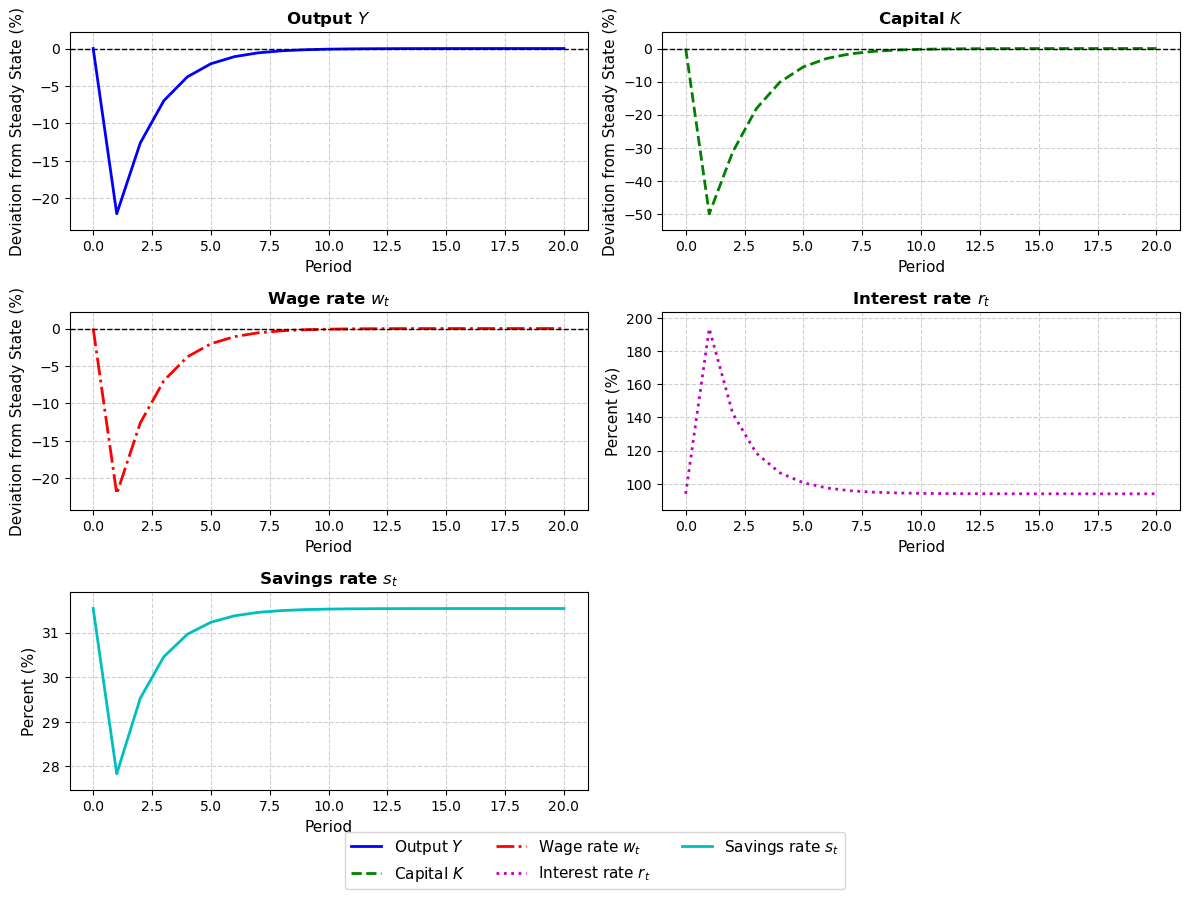

In [12]:
def plot_simulation(eq, sim, z_series=None, eq_pension=None):
    """
    Plots the OLG models in PART 3, 4 and 6
    """

    # Creating a 3-row, 2-column (subplots) layout for all the parts (PART 3, 4 and 6) 
    fig, axes = plt.subplots(3, 2, figsize = (12, 9))

    # Checking if simulation results are stores in dictionary format 
    is_dict = isinstance(sim, dict)
    
    # Defining title labels, data series, and y-axis labels on whether TFP is included (to distinguish between PART 3&4, and PART 6)
    # If TFP is included plotting the time series of othe variables changing over time alongside the TFP
    if z_series is not None:
        labels = ['TFP $z_t$', 'Output $Y$', 'Capital $K$', 'Wage rate $w_t$', 'Interest rate $r_t$', 'Savings rate $s_t$']
        series = [(z_series, 'k', '-', 'TFP Level $z_t$'), 
                  (sim['Y'] if is_dict else sim.Y, 'b', '-', 'Output $Y$'), 
                  (sim['K'] if is_dict else sim.K, 'g', '--', 'Capital $K$'), 
                  (sim['w_t'] if is_dict else sim.w_t, 'r', '-.', 'Wage rate $w_t$'), 
                  (sim['r_t'] if is_dict else sim.r_t, 'm', ':', 'Interest rate $r_t$'),
                  (sim['s_t'] if is_dict else sim.s_t, 'c', '-', 'Savings rate $s_t$')
                  ]
    
        y_labels = ['TFP Level',
                    'Time Series for Y', # Output
                    'Time Series for K', # Capital
                    'Time Series for w_t', # Wage rate
                    'Time Series for r_t', # Interest rate
                    'Time Series for s_t' # Savings rate 
                    ]
        
    # If TFP not included plot the deviations from steady state for Y, K and w_t, in percentage terms. And the r_t and s_t as just simulated series 
    else: 
        labels = ['Output $Y$', 'Capital $K$', 'Wage rate $w_t$', 'Interest rate $r_t$', 'Savings rate $s_t$']
        series = [((sim['Y'] / eq.Y - 1) * 100 if is_dict else (sim.Y / eq.Y - 1) * 100, 'b', '-', 'Output $Y$'), 
                  ((sim['K'] / eq.K - 1) * 100 if is_dict else (sim.K / eq.K - 1) * 100, 'g', '--', 'Capital $K$'), 
                  ((sim['w_t'] / eq.w_t - 1) * 100 if is_dict else (sim.w_t / eq.w_t - 1) * 100, 'r', '-.', 'Wage rate $w_t$'), 
                  (sim['r_t'] * 100 if is_dict else sim.r_t * 100, 'm', ':', 'Interest rate $r_t$'),
                  (sim['s_t'] * 100 if is_dict else sim.s_t * 100, 'c', '-', 'Savings rate $s_t$')
                  ]
        
        y_labels = ['Deviation from Steady State (%)', # Output
                    'Deviation from Steady State (%)', # Capital
                    'Deviation from Steady State (%)', # Wage rate
                    'Percent (%)', # Interest rate
                    'Percent (%)' # Savings rate 
                    ]
    
    # Flattening the axes array for easier indexing
    axes = axes.flatten()

    # Storing plotted lines for the legend to ensure legend colors match the colors on each graph
    plotted_lines = []

    # Looping each of the economic variables to create a plot for each 
    for i, ax in enumerate(axes[:len(series)]):
        line, = ax.plot(series[i][0], color = series[i][1], linestyle = series[i][2], linewidth = 2, label = series[i][3])
        plotted_lines.append(line)

        # Setting plot titles and labels 
        ax.set_title(labels[i], fontsize = 12, fontweight = 'bold')
        ax.set_xlabel('Period', fontsize = 11)
        ax.set_ylabel(y_labels[i], fontsize = 11)
        ax.grid(True, linestyle = '--', alpha = 0.6)

        # Adding a reference line at 0 for the deviation plots, for PART 3 and 4
        if z_series is None:
            ax.axhline(0, color = 'black', linewidth = 1, linestyle = '--')

        # Determening Y-axis range for the graphs without PAYGO system (pension)
        y_min, y_max = min(series[i][0]), max(series[i][0])
        
        # Plotting the graphs for when PAYGO is included (PART 4)
        if eq_pension is not None:
            sim_pension_series = [(np.array(sim['Y']) / eq_pension.Y - 1 if is_dict else np.array(sim.Y) / eq.Y - 1, 'b', '-'), 
              (np.array(sim['K']) / eq_pension.K - 1 if is_dict else np.array(sim.K) / eq.K - 1, 'g', '--'), 
              (np.array(sim['w_t']) / eq_pension.w_t - 1 if is_dict else np.array(sim.w_t) / eq.w_t - 1, 'r', '-.'), 
              (np.array(sim['r_t']) * 100 if is_dict else np.array(sim.r_t) * 100, 'm', ':'),
              (np.array(sim['s_t']) * 100 if is_dict else np.array(sim.s_t) * 100, 'c', '-')    
             ]
            
            # Determening Y-axis range for the graphs with PAYGO system (pension)
            y_min_pension, y_max_pension = min(sim_pension_series[i][0]), max(sim_pension_series[i][0])

            # Setting y-axis limits to include both cases 
            y_min = min(y_min, y_min_pension)
            y_max = max(y_max, y_max_pension)
            
            # Plotting the PAYGO system alternatives as DOTTED lines 
            ax.plot(sim_pension_series[i][0], color = series[i][1], linestyle = 'dotted', linewidth = 2, label = "With PAYGO")
            ax.legend()
    
        # Applying scaling with buffer of +/- 10% for y-axis
        if z_series is None:
            buffer = 0.1 * (y_max - y_min)
            ax.set_ylim(y_min - buffer, y_max + buffer)

    # Removing any unused subplots in the plots for PART 3 and 4 as z_series is not included here (TFP)
    if z_series is None:
        fig.delaxes(axes[-1])

    # Ensuring legend colors match the graphs 
    fig.legend(handles = plotted_lines, loc = 'lower center', ncol = 3, fontsize = 11, frameon = True)

    # Adjusting layout, preventing overlapping elements 
    plt.tight_layout(rect = [0, 0.05, 1, 1])

    # Displaying the plot
    plt.show()

# Computing steady state values 
par = Parameters() # Loading model parameters from earlier for PART 3 (no PAYGO)
eq = compute_steady_state(par) # Steady state for PART 3 without PAYGO

# Simulating transition after a capital shock
K_1 = eq.K / 2
T = 20 # Numbers of periods in simulation

# Simulating the transition dynamics of the economy using the function simulate_olg (No PAYGO)
sim = simulate_olg(K_1, T, eq, par)

# Plotting result for PART 3 (No PAYGO)
plot_simulation(eq, sim)

### 4. Comments:
The transition dynamics illustrate the economy gradual return to the steady state after the sudden halving of the capital stock. In period 1, capital K, output Y, wages, and savings drop sharply as capitals falls by 50% from its steady state level from the shock. This reduction leads to a significant increase in the interest rate which reflects the increased scarcity of capital. The higher return on savings now incentives to more saving after the capital shock and therefore the savings rate increases sharply directly afterwards. And over time the economy gradually rebuilds its capital stock causing the other variables to converge back to its steady state. 

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>
The transition dynamics are correctly simulated and the results are consistent with the proposed solution. The plots are well presented and labeled. The explanation of the transition dynamics is clear and effectively describes the effects of the capital shock on the economy.

***

## Part 4 - Pay as you go (PAYGO) pension system:
For this task we assume that the government decides to introduce a pay-as-you-go pensions system which taxes young households and redistributes the revenue as pensions to the old.

### 1. Plotting simulations based on modified code

The Steady State Equilibrium Quantities and Prices:
Capital Stock: 0.0381
Labour Demand: 1.0000
Output: 0.3084
Interest Rate: 2.0711
Wage Rate: 0.1974
Savings: 0.0381
Consumption Old: 0.1367
Consumption Young: 0.1395


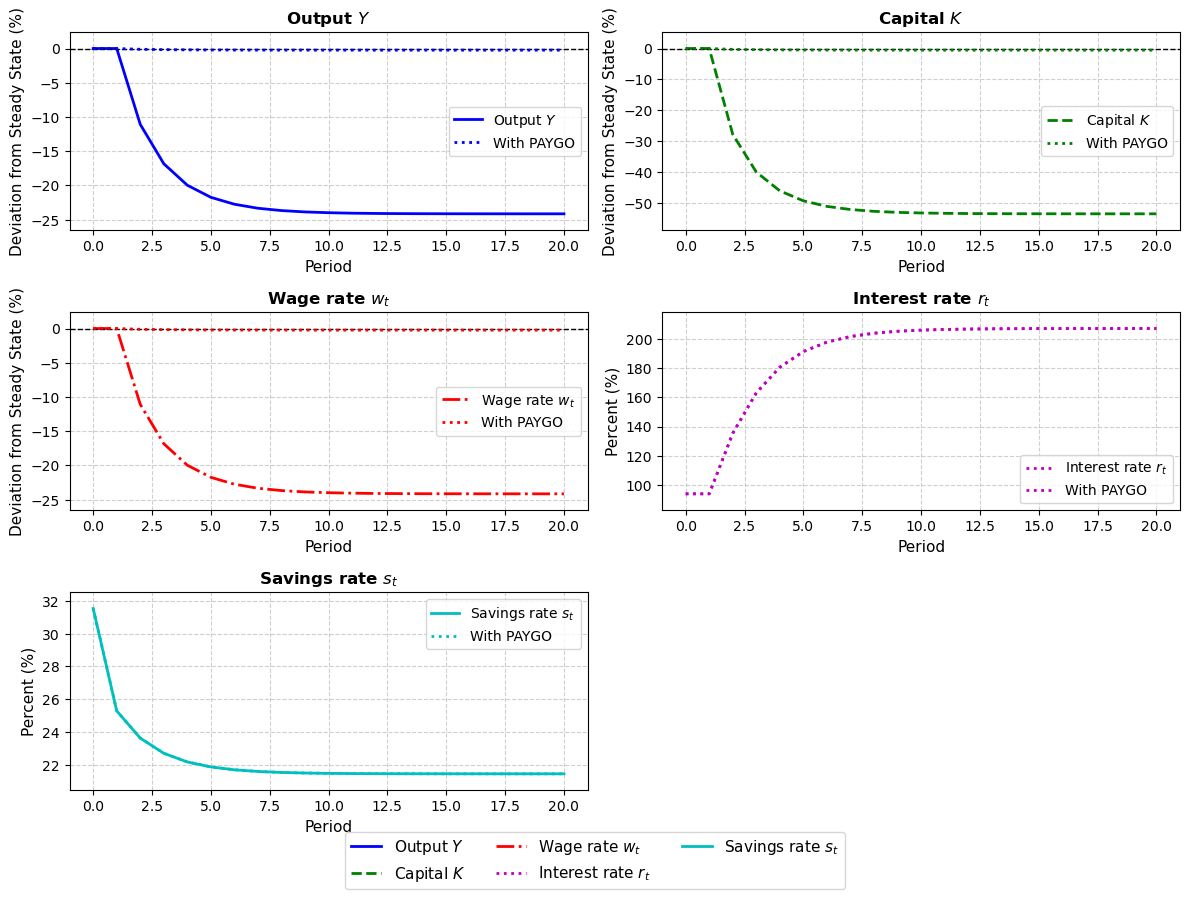

In [13]:
# Defining model parametrs, now including the PAYGO tax of 10% (0.1)
par = Parameters(tau = 0.1)

# Computing the new steady state equilibrium quantities and prices with PAYGO system 
eq_pension = compute_steady_state(par)

# Printing the steady state values 
print_steady_state(eq_pension)

# Simulating transition dynamics, assuming economy starts from original steady state (eq.K = K without PAYGO system)
sim_olg_pension = simulate_olg(eq.K, T, eq, par)

# Generating plots for PAYGO system
plot_simulation(eq, sim_olg_pension, z_series=None, eq_pension=eq_pension)

### 2. Comments:
The introduction of the pay-as-you-go pension system has a significant impatc on the steady state equilibrium. The capital stock drops from 0.0821 to 0.031 which leads to lower output and wages while the steady state interest rate increases drastically reflecting the lower availability of capital. Since young households now pay taxes and receive pensions when they are old it reduces the need for savings and st is lower. 

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>

The steady state equilibrium is correctly computed and the results are consistent with the proposed solution. The introduction of the PAYGO pension system has a significant impact on the steady state equilibrium, as described in the comments. The plots are well presented and labeled.

To improve readability, steady state print and simulation plotting could be separated into different cells.
***

## Part 5: TFP as an AR(1)
In this section we extend the OLG model by introducing an aggregate uncertainty through stochastic total facor productivity which is assumed to follow an autoregressive process of order 1 in logs.

### 1. Definining function for simulation:

In [14]:
def simulate_ar1(z0, T, seed, par: Parameters):
    """
    Simulate an AR(1) process for TFP.
    """
    # Setting random seed 
    np.random.seed(seed)

    # Initializing an array with T + 1 periods to store the simulated TFP series
    z_series = np.zeros(T + 1)

    # Ensuring initial TFP value is positive (to avoid errors / issues in logarithm)
    z_series[0] = max(z0, 1e-8) 

    # Looping through each period to simulate the TFP evolution
    for t in range(T):

        # Drawing a random shock (epsilon) from the discretized normal distribution defined in par (parameters)
        epsilon_t = np.random.choice(par.epsilon_grid, p = par.epsilon_prob)

        # Computing log TFP for next period using AR(1) formula, log transformation ensuring positivity
        log_z_next = par.mu + par.rho * np.log(max(z_series[t], 1e-6)) + np.sqrt(par.sigma_2) * epsilon_t

        # Converting the log TFP back to level from, by exponentiating 
        z_series[t + 1] = np.exp(log_z_next)

    return z_series

### 2. Simulating for 100,000 periods:

In [15]:
# Defining the number of periods for the given simulation (100,000)
T = 100000

# Setting the initial TFP value to steady state level = 1
z0 = 1.0

# Setting a fixed random seed ensuring fixed randomness 
seed = 1234

# Simulating the AR(1) process for TFP (Total Factor Productivity)
simulated_z = simulate_ar1(z0, T, seed, par)

# Computing the average TFP and printing it  
average_tfp = simulated_z.mean()
print(f"Average simulated TFP: {average_tfp:.5f}")

# Verifying that the average is close to 1 by computing the difference from 1 and ensuring that it is sufficiently small 
TFP_error = average_tfp - 1
assert abs(TFP_error) < 0.004, "Average / Mean TFP is not close to 1."

Average simulated TFP: 1.00005


### 3. Comments:
The simulation confirms that the average TFP over 100 000 periods is approximately 1, which validates that the discretized AR(1) process preserves the intendedn mean of productivity.

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>

The simulation is correctly implemented and the results are consistent with the proposed solution $\Rightarrow$ The average TFP over 100 000 periods is approximately 1.

Instead of using the `max` function to handle invalid values of `z`, it would be better to raise an error if `z < 0`. This is because $TFP \in [0, \infty)$ and negative values of `z` are invalid. The used `max` function essentially ignores the invalid values of `z` and replaces them with 0, which could lead to incorrect interpretations of the results. In my opinion, it would therefore be better to raise an error if `z < 0` to avoid this issue.
***

## Part 6: OLG model with aggregate risk
In this part we incorporate aggregate risk into the OLG model by allowing total factor productivity to follow the stochastic AR(1) process introduced in part 5. This will add uncertainty to the households optimization problem as future wages and interest rates are no longer derterministc.

### 1. Implementing the euler error AR(1) function:

In [16]:
def euler_err_ar1(k_next, k, z, par: Parameters):
    """
    Compute the Euler equation error if log TFP follows AR(1) process.
    """
    # Checking if the shock grid (epsilon grid) and probabilities are properly initialized, otherwise raising an error
    if par.epsilon_grid is None or par.epsilon_prob is None:
        raise ValueError('epsilon_grid or epsilon_prob is not initialized in Parameters')

    # Computing current wages and interest rates
    w_t_now_ar, r_t_now_ar = compute_rates(k, par)

    # Adjusting wages and interest rate by the level of TFP, taking productivity shock into account 
    w_t_now_ar *= z 
    r_t_now_ar = r_t_now_ar*z/par.z 

    # Computing young consumption 
    c_y_ar = ((1 - par.tau) * w_t_now_ar) - k_next

    # Checking if consumption is negative or zero, assigning a large error if that is the case 
    if np.any(c_y_ar <= 0):
        return np.inf 
    
    # Initialzing the expected RHS of the Euler equation to be 0
    expected_rhs_ar = 0.0

    # Computing expected discounted marginal utility for old consumption 
    for i in range(len(par.epsilon_grid)):
        epsilon_next = par.epsilon_grid[i] # Shock next period
        prob = par.epsilon_prob[i] # Probability of the shock

        # Computing nex periods TFP level using AR(1)
        log_z_next = par.mu + (par.rho * np.log(z)) + (np.sqrt(par.sigma_2) * epsilon_next)
        z_next = np.exp(log_z_next) # Converting back to level form 

        # Computing nex periods wage and interest rates 
        w_t_next_ar, r_t_next_ar = compute_rates(k_next, par) 

        # Adjusting the wage and interest rates for TFP
        w_t_next_ar *= z_next 
        r_t_next_ar = r_t_next_ar*z_next/par.z

        # Computing next periods pension for old consumption
        pension_next_ar = par.tau * w_t_next_ar

        # Computing old consumption
        c_o_ar = ((1 + r_t_next_ar) * k_next) + pension_next_ar

        # Checking if consumption is negative or zero, assigning a large error if that is the case
        if np.any(c_o_ar <= 0):
            return np.inf 
    
        # Computing the expected RHS of Euler equation 
        expected_rhs_ar += prob * par.beta * (1 + r_t_next_ar) * marginal_util(c_o_ar, par.gamma)

    # Computing the LHS of Euler equation
    lhs_ar = marginal_util(c_y_ar, par.gamma)
    
    # Computing the Euler error 
    err_ar = lhs_ar - expected_rhs_ar

    return err_ar

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>
The function is correctly implemented besides the missing `z` argument in the `compute_rates` function, which is required for the function to work when `z` changes over time. In the next part, the `simulate_olg_ar1` function will take the new argument `z_series`. When looping over the `z_series`, the function `euler_err_ar1` will be called with a `z[t]` argument. This argument will be used inside the `euler_err_ar1` function, but not when the  `compute_rates` is called. This will lead to incorrect results, and thus the deviation from the proposed solution.

The function `euler_err_ar1` in the proposed solution uses vectorization instead of loops for efficiency. The submission uses loops, which is fine, but the solution could be improved by using vectorization. 

The function includes an error handling mechanism for the shock grid and probability values, which is good practice. This is something that I could have implemented in my code as well - and would have if I had thought of it. 
***

## 2. Implementing the simulation function for the OLG model with AR(1):

In [17]:
def simulate_olg_ar1(K0, z_series, par: Parameters):
    """
    Simulate the transition dynamics of the OLG model staring for given initial capital.
    """

    # Determening the number of periods in the simulation, being the length of the z_series
    T = len(z_series) 
    
    # Initializing simulated time series storage arrays for each variable 
    K_series = np.zeros(T + 1) # Capital stock, T + 1 to track future capital stock 
    Y_series = np.zeros(T) # Output (flow variable)
    w_series = np.zeros(T) # Wage rate (flow variable)
    r_series = np.zeros(T) # Interest rate (flow variable)
    s_series = np.zeros(T) # Savings rate (flow variable)

    # Setting intial capital stock 
    K_series[0] = K0

    # Simulating for range T 
    for t in range(T):
        
        # Retrieving current TFP and capital stock 
        z_t, K_t = z_series[t], K_series[t]

        # Defining an upper bound for savings 
        upper_bound = (1 - par.tau) * z_t * (K_t ** par.alpha)

        # Solving for savings using the Euler equation 
        try:
            # Using root-finding to solve for savings ensuring svaings stay in relaistic bounds
            a_t = root_scalar(lambda k_next: euler_err_ar1(k_next, K_t, z_t, par), bracket = [1e-4, upper_bound], method = 'brentq').root
        except ValueError as e:
            # Check if root-finding fails, and raise error telling where it failed
            raise RuntimeError(f'Root-finding failed at t = {t}, K_t = {K_t}, z_t = {z_t}') from e
        
        # Updating capital stock for next period
        K_series[t + 1] = a_t

        # Computing output, wage rate and interest rate 
        Y_series[t] = z_t * (K_series[t] ** par.alpha)
        w_series[t] = (1 - par.alpha) * z_t * (K_t ** par.alpha)
        r_series[t] = (par.alpha * z_t * (K_t ** (par.alpha - 1))) - par.delta

        # Computing svaings rate, ensuring not dividing by 0
        s_series[t] = np.where(w_series[t] > 0, K_series[t + 1] / w_series[t], 0.0)
        
        # Computing young consumption 
        c_y = (1 - par.tau) * w_series[t] - K_series[t + 1]

        # Computing pension
        pension_t = par.tau * w_series[t]

        # Computing old consumption taking pension into account
        c_o = ((1 + r_series[t]) * K_t) + pension_t

        # Using goods market clearing condition provided to verify the solutions
        clearing_error_ar1 = Y_series[t] - (c_y + c_o + K_series[t + 1]) + ((1 - par.delta) * K_t)
        assert abs(clearing_error_ar1) < 1.0e-8 , f'Goods market condition failed at t = {t}'

    # Returning simulation results as dictionary, ensuring a strcutures format to store variables and easier to plot later
    return {'K': K_series[:-1],
        'Y': Y_series,
        'w_t': w_series,
        'r_t': r_series,
        's_t': s_series,
        'z_t': z_series}


## 3. Simulation:

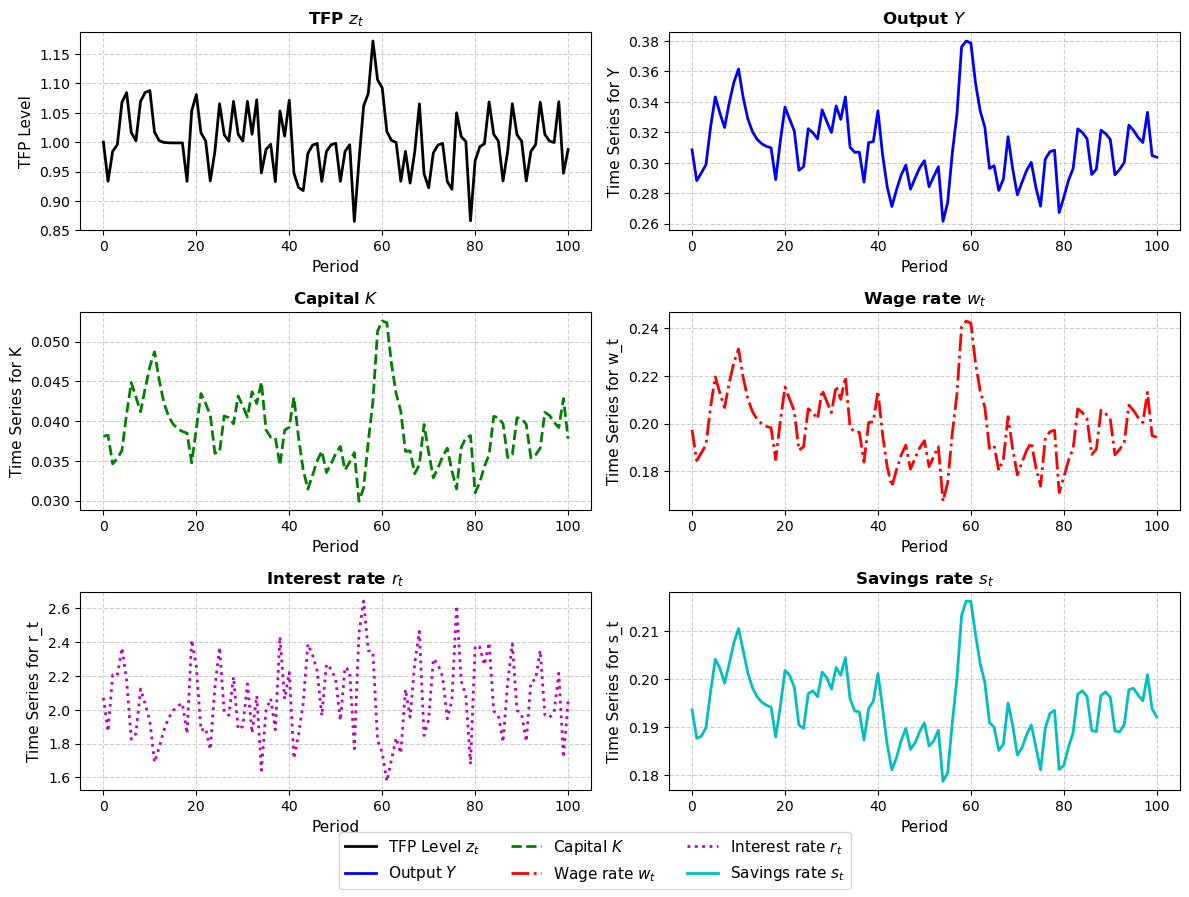

In [18]:
# Simulating TFP path for 100 periods
T_sim = 100

# Setting a fixed random seed ensuring fixed randomness 
seed = 1234

# Setting the initial TFP value to steady state level = 1
z0 = 1.0

# Simulating the TFP process with an AR(1) shock
z_series_ar = simulate_ar1(z0, T = T_sim, seed = seed, par = par)

# Computing steady state under PAYGO system
par = Parameters(tau = 0.1)
eq_pension_ar = compute_steady_state(par)

# Simulating OLG time series model under TFP, starting from steady state
sim_OLG_TFP_ar = simulate_olg_ar1(eq_pension_ar.K, z_series_ar, par)

# Using the extended plot_simulation function created for PART 3
plot_simulation(eq_pension_ar, sim_OLG_TFP_ar, z_series = z_series_ar)

## 4. Comments:
This simulation shows how stochastic TFP changes influences the economy. Fluctuations in TFP generates similar patterns in the other variables. As TFP rises, output, wages, capital, interests and savings tend to increase. 

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>
As explained earlier, the results deviate from the proposed solution due to the missing `z` argument in the `compute_rates` function. However, the outputs look nice and the plots are well presented and labeled. The plotting function is used for the third time in this submission, without needing to redefine it. This is good practice and avoids unnecessary code repetition.

***

## Part 7: Changing the volatility of TFP:
In this final section we investigate how varying the volatility of total factory productivity influences the economy's long term behavior. 

### 1. Simulating:

In [19]:
# Creating a grid of sigma values, the standard deviation of productivity shocks 
sigma_grid = np.linspace(0, 0.1, 11)

# Creating arrays to store deviations in capital stock and savings rate 
Capital_deviation = np.zeros(len(sigma_grid)) # Percentage deviation in capital 
Saving_deviation = np.zeros(len(sigma_grid)) # Percentage deviation in savings rate 

# Determening the number of simulation periods 
T = 10000 

# Setting a fixed random seed ensuring fixed randomness 
seed = 1234

# Looping over different values of TFP shocks volatility (sigma)
for i, sigma in enumerate(sigma_grid):
    
    # Updating parameter values for a given sigma 
    par.sigma_2 = sigma**2 
    par.mu = -0.5 * par.sigma_2 / (1 + par.rho)

    # Simulating TFP with the level of uncertainty / volatility 
    z_series = simulate_ar1(1.0, T, seed, par)

    # Simulating OLG model with TFP process 
    sim_result_dev = simulate_olg_ar1(eq_pension.K, z_series, par)

    # Computing averages for capital and savings rate (long run)
    K_average = np.mean(sim_result_dev['K'])
    s_average = np.mean(sim_result_dev['s_t'])

    # Computing percentage deivations from steady state (baseline = no shocks) for both capital and savings rate 
    Capital_deviation[i] = ((K_average - eq_pension_ar.K) / eq_pension_ar.K )* 100
    Saving_deviation[i] = ((s_average - eq_pension_ar.s_t) / eq_pension_ar.s_t) * 100

### 2. Plotting:

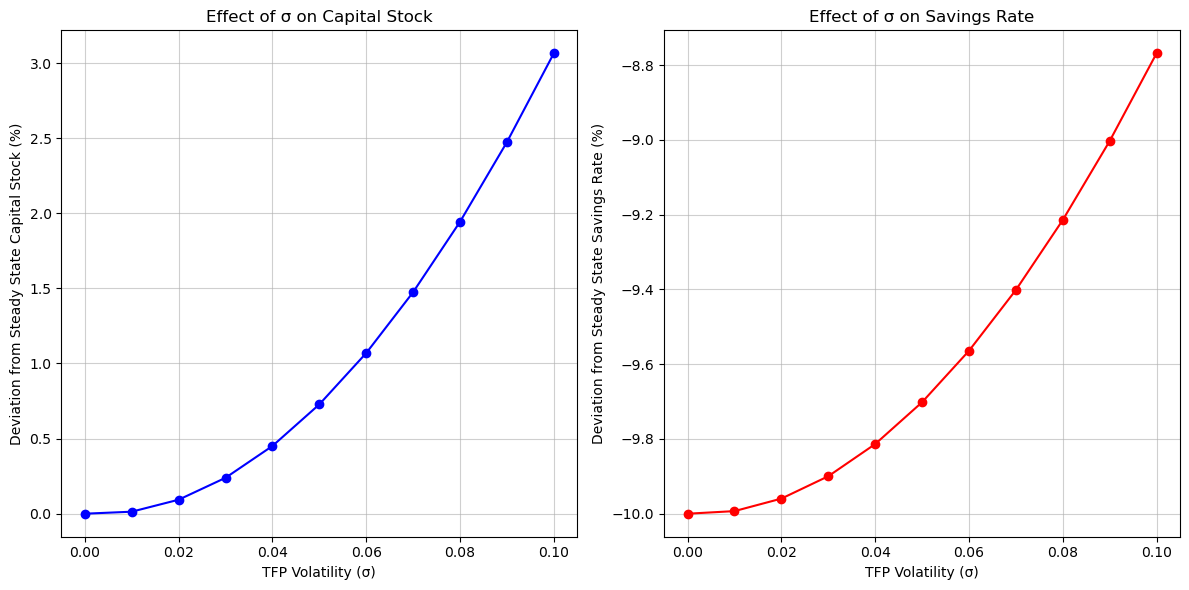

In [20]:
# Creating a 1-row, 2-column (subplots) layout  
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting capital stock (K) deviation as a function of sigma (TFP volatility)
axes[0].plot(sigma_grid, Capital_deviation, marker='o', color='blue')

# Setting plot and axis titles and labels 
axes[0].set_title("Effect of σ on Capital Stock")
axes[0].set_xlabel("TFP Volatility (σ)")
axes[0].set_ylabel("Deviation from Steady State Capital Stock (%)")

# Adding grid for for better visualisation
axes[0].grid(True, alpha = 0.6)

# Plotting savings rate (s) deviation as a function of sigma (TFP volatility)
axes[1].plot(sigma_grid, Saving_deviation, marker='o', color='red')

# Setting plot and axis titles and labels 
axes[1].set_title("Effect of σ on Savings Rate")
axes[1].set_xlabel("TFP Volatility (σ)")
axes[1].set_ylabel("Deviation from Steady State Savings Rate (%)")

# Adding grid for for better visualisation
axes[1].grid(True, alpha = 0.6)

# Adjusting layout, preventing overlapping elements 
plt.tight_layout()

# Displaying the plot
plt.show()

### 3. Comments:
As TFP becomes more volatile the future becomes riskier for households and since they are uncertain about future wages and interest rates, they increase their savings to insure against shocks. And higher savings then lead to a larger capital stock over time. This behavior is displayed in the two figures above as both savings and capital is increasing. 

***
### <span style="color: #cc3535">***Peer-Review: Comment*** </span>
The loop is correctly implemented and easy to follow. Again, the results deviate from the proposed solution due to the missing `z` argument in the `compute_rates` function. The explanation of the effects of TFP volatility on the economy is okay, but could be more detailed. 

The explanation could be improved by explaining that when $\sigma = 0 \Rightarrow z = 1$. And since we are simulating the economy for $T = 10$ $000$ periods, the average $K$ and $s$ are very close to their steady state values, leading to approxomately 0 deviations from the steady state when $\sigma = 0$. This is why the plots show no deviations from the steady state when $\sigma = 0$.
***